<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#6.-학습-관련-기술들" data-toc-modified-id="6.-학습-관련-기술들-1">6. 학습 관련 기술들</a></span><ul class="toc-item"><li><span><a href="#6.1-매개변수-갱신" data-toc-modified-id="6.1-매개변수-갱신-1.1">6.1 매개변수 갱신</a></span><ul class="toc-item"><li><span><a href="#[모험가-이야기]" data-toc-modified-id="[모험가-이야기]-1.1.1">[모험가 이야기]</a></span></li><li><span><a href="#[확률적-경사-하강법(SGD)" data-toc-modified-id="[확률적-경사-하강법(SGD)-1.1.2">[확률적 경사 하강법(SGD)</a></span></li><li><span><a href="#[SGD의-단점]" data-toc-modified-id="[SGD의-단점]-1.1.3">[SGD의 단점]</a></span></li><li><span><a href="#[모멘텀]" data-toc-modified-id="[모멘텀]-1.1.4">[모멘텀]</a></span></li><li><span><a href="#[AdaGrid]" data-toc-modified-id="[AdaGrid]-1.1.5">[AdaGrid]</a></span></li><li><span><a href="#[Adam]" data-toc-modified-id="[Adam]-1.1.6">[Adam]</a></span></li><li><span><a href="#[어느-갱신-방법을-이용할-것인가?]" data-toc-modified-id="[어느-갱신-방법을-이용할-것인가?]-1.1.7">[어느 갱신 방법을 이용할 것인가?]</a></span></li><li><span><a href="#[MNIST-데이터셋으로-본-갱신-방법-비교]" data-toc-modified-id="[MNIST-데이터셋으로-본-갱신-방법-비교]-1.1.8">[MNIST 데이터셋으로 본 갱신 방법 비교]</a></span></li></ul></li><li><span><a href="#6.2-가중치의-초기값" data-toc-modified-id="6.2-가중치의-초기값-1.2">6.2 가중치의 초기값</a></span><ul class="toc-item"><li><span><a href="#[가중치-초기값을-0으로-하면?]" data-toc-modified-id="[가중치-초기값을-0으로-하면?]-1.2.1">[가중치 초기값을 0으로 하면?]</a></span></li></ul></li></ul></li></ul></div>

# 6. 학습 관련 기술들

- 이번 장에서는 신경망 학습의 핵심 개념들을 다룹니다.
> - 가중치 매개변수의 최적값을 탐색하는 방법, 가중치 매개변수 초기값, 하이퍼파라미터 설정 방법 등
> - 가중치 감소 및 드롭아웃 등의 정규화 방법, 배치 정규화
- 이번 장에서 설명하는 기법을 이용하면 신경망(딥러닝) 학습의 효율과 정확도를 높일 수 있습니다.

## 6.1 매개변수 갱신

- 신경망 학습의 목적은 손실 함수의 값을 가능한 낮추는 최적의 매개변수를 찾는 것이며, 이러한 문제를 푸는 것을 **최적화(Optimization)**라 함
- **확률적 경사 하강법(SGD)**은 매개변수의 기울기(미분)를 구해, 기울어진 방향으로 매개변수 값을 갱신하는 일을 반복해서 최적의 매개변수를 찾는 방법

### [모험가 이야기]

- 모험가는 광대하고 복잡한 산맥에서 지도도 없이 눈을 가린 채로 "가장 깊고 낮은 골짜기"를 찾아야 함
- 모험가가 지금 서 있는 땅의 "기울기"를 이용해 가장 크게 기울어진 방향으로 가는 것이 SGD의 전략임

### [확률적 경사 하강법(SGD)

- **SGD 수식** ---- \[식 6.1]
> $$\normalsize \matrix W \leftarrow \matrix W - \ \eta \ \frac{\delta L}{\delta W}$$ <br>
> - 손실함수의 기울기를 이용하여, 매개변수를 갱신하는(최적의 매개변수를 찾는) Optimizer 함수
> - $\normalsize \matrix W$는 갱신할 가중치 매개변수
> - $\large \frac{\delta L}{\delta W}$는 $\normalsize \matrix W$에 대한 손실 함수의 기울기
> - $\normalsize \eta$ 는 학습률을 의미하며, 실제로는 0.01, 0.001과 같은 값을 미리 정해서 사용
> - $\normalsize \leftarrow$ 는 우변의 값으로 좌변의 값을 갱신한다는 뜻

In [1]:
# SGD 클래스 구현
class SGD:
    def __init__(self, lr=0.01):    # lr은 learning rate
        self.lr = lr
    
    def update(self, params, grads):   # params는 가중치 매개변수, grads는 기울기
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [2]:
# 신경망 매개변수의 학습 수행
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet


(x_train, t_train), (x_test, t_test) = load_mnist(
    normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

optimizer = SGD()   # 매개변수를 갱신하는 optimizer 객체 생성 (위에서 정의한 SGD 클래스의 인스턴스)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1


def get_mini_batch(x_train, t_train, batch_size):
    batch_mask = np.random.choice(x_train.shape[0], batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    return x_batch, t_batch


for i in range(iters_num):
    x_batch, t_batch = get_mini_batch(x_train, t_train, batch_size)

    # 오차역전파법으로 기울기를 구한다.
    grads = network.gradient(x_batch, t_batch)

    params = network.params

    # 매개변수 갱신
    optimizer.update(params, grads)


train_acc = network.accuracy(x_train, t_train)
test_acc = network.accuracy(x_test, t_test)
print("train_acc, test_acc : {:.3f}, {:.3f}".format(train_acc, test_acc))

train_acc, test_acc : 0.920, 0.922


### [SGD의 단점]

- SGD는 단순하고 구현도 쉽지만, 문제에 따라서는 비효율적일 때가 있음
- 다음 함수의 최소값을 구하는 문제를 통해 문제점 확인 ---- \[식 6.2]
> $$\normalsize f(x, y) = \frac{1}{20} x^2 + y^2$$

- **$\normalsize f(x, y) = \frac{1}{20} x^2 + y^2$의 그래프와 등고선**
> - 이 그래프는 밥그릇을 $x$ 축 방향으로 늘인 듯한 모습이고,
> - 그 등고선은 $x$ 축 방향으로 늘인 타원으로 되어 있음 

Text(0.5, 0, 'Z')

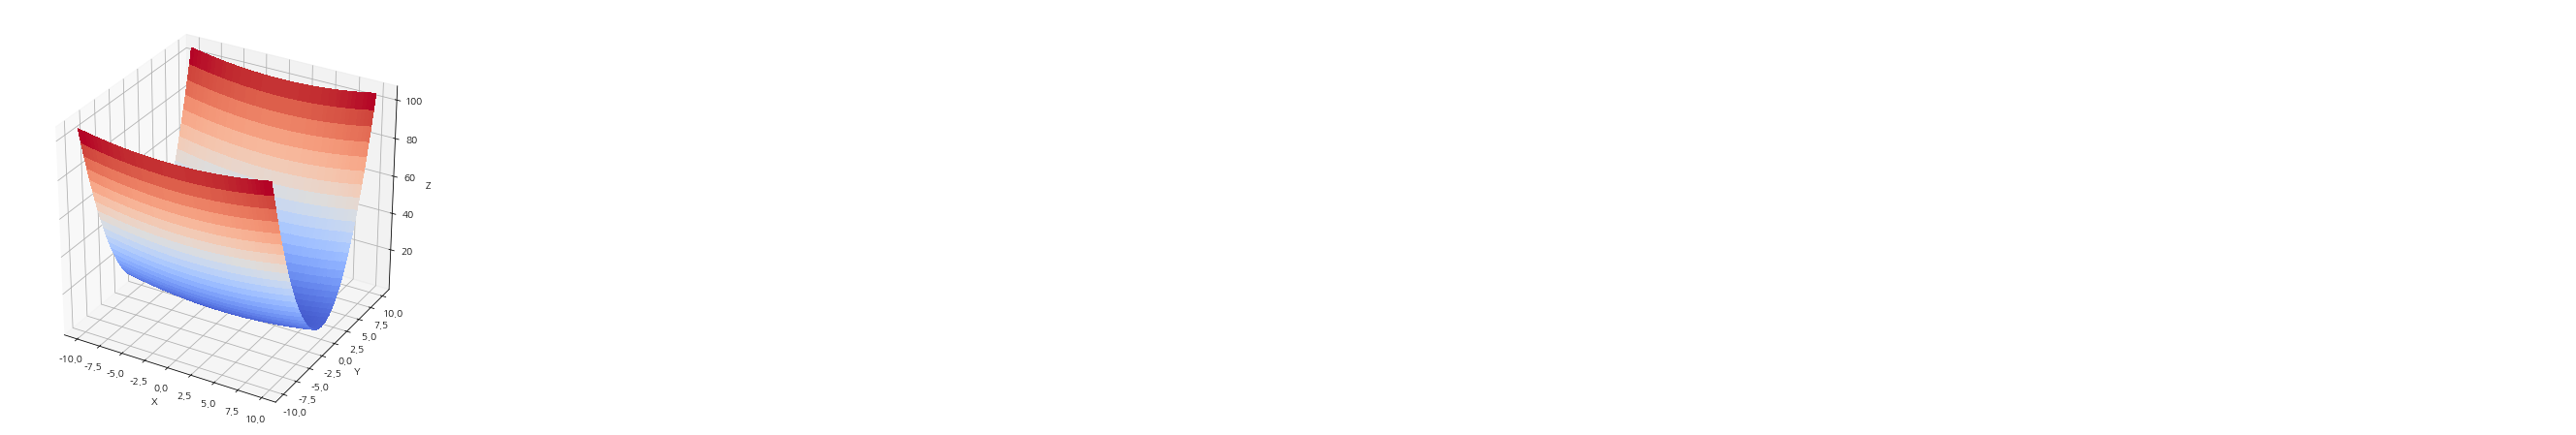

In [12]:
# [식 6.2]의 그래프 --- [그림 6-1]
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def function_anisotropy(x):    # 비등방성 함수(anisotropy, 방향에 따라 기울기가 달라지는 함수)
    return x[0]**2 / 20.0 + x[1]**2

x = np.arange(-10, 10, 0.01)      # (2000, )
y = np.arange(-10, 10, 0.01)      # (1000, )

X, Y = np.meshgrid(x, y)        # meshgrid로 2차원 행렬 만들기 : X와 Y 모두 (1000, 2000)
Z = function_anisotropy(np.array([X, Y]))     # (2, 1000, 2000)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')     # 3차원 그래프

wire = ax.plot_wireframe(X, Y, Z, color='k', linewidth=0.1)
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', linewidth=0, antialiased=False)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
# fig.colorbar(surf, shrink=0.5, aspect=5)

Text(0, 0.5, 'y')

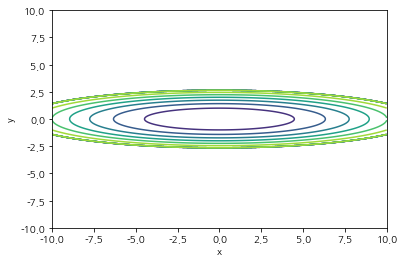

In [16]:
# [식 6.2]의 등고선 ---- [그림 6-2]

# 외곽선 단순화
mask = Z > 7
Z[mask] = 0

# 그래프 그리기
plt.contour(X, Y, Z)
plt.xlabel("x")
plt.ylabel("y")

- **$\normalsize f(x, y) = \frac{1}{20} x^2 + y^2$의 기울기**

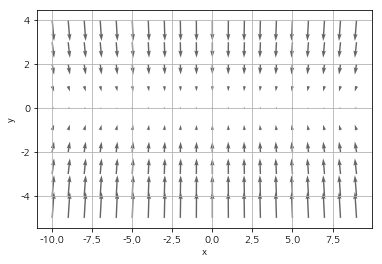

In [599]:
# [식 6-2]의 기울기 구현 (기울기에 마이너스를 붙인 벡터의 그래프) ---- [그림 6-3]
def gradient(X):
    grads = np.zeros_like(X)        # (2, 200)
    
    # f(x, y) = 1/20 * x^2 + y^2의 편도함수 수치 미분 : ∂f/∂x = ( f(x+∆x, y) - f(x-∆x, y) ) / 2∆x,   ∂f/∂y = ( f(x, y+∆y) - f(x, y-∆y) ) / 2∆y
    # f(x, y) = 1/20 * x^2 + y^2의 편도함수 해석적 미분
    for idx in range(X[0].size):       # numpy 배열을 크게 
        # df/dx = x/10
        grads[0] = (X[0] / 10.0) * 10       # 결과를 적당하게 키우기 위해 10을 곱함
        
        # df/dy = 2y
        grads[1] = (2.0 * X[1]) * 10          # 결과를 적당하게 키우기 위해 10(df/dx에 곱해준 값과 동일한 값)을 곱함

    return grads

x = np.arange(-10, 10, 1)       # (20, )       # 기울기를 화면에 그리기 위해서는 x와 y의 데이터 차원이 너무 크면 안됨(화살표가 너무 많아짐)
y = np.arange(-5, 5, 1)           # (10, )
X, Y = np.meshgrid(x, y)       # (10, 20)

Xf = X.flatten()             # (200, )
Yf = Y.flatten()             # (200, )

grads = gradient(np.array([Xf, Yf]))      # (2, 200)
    
plt.figure()
plt.quiver(Xf, Yf, -grads[0], -grads[1], angles="xy", color="#666666")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [600]:
grads[0]

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9, -10,  -9,  -8,  -7,  -6,  -5,
        -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,
         9, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
         2,   3,   4,   5,   6,   7,   8,   9, -10,  -9,  -8,  -7,  -6,
        -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,
         8,   9, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
         1,   2,   3,   4,   5,   6,   7,   8,   9, -10,  -9,  -8,  -7,
        -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,
         7,   8,   9, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,
         0,   1,   2,   3,   4,   5,   6,   7,   8,   9, -10,  -9,  -8,
        -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,
         6,   7,   8,   9, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,
        -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9, -1

In [601]:
grads[1]

array([-100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100,  -80,  -80,
        -80,  -80,  -80,  -80,  -80,  -80,  -80,  -80,  -80,  -80,  -80,
        -80,  -80,  -80,  -80,  -80,  -80,  -80,  -60,  -60,  -60,  -60,
        -60,  -60,  -60,  -60,  -60,  -60,  -60,  -60,  -60,  -60,  -60,
        -60,  -60,  -60,  -60,  -60,  -40,  -40,  -40,  -40,  -40,  -40,
        -40,  -40,  -40,  -40,  -40,  -40,  -40,  -40,  -40,  -40,  -40,
        -40,  -40,  -40,  -20,  -20,  -20,  -20,  -20,  -20,  -20,  -20,
        -20,  -20,  -20,  -20,  -20,  -20,  -20,  -20,  -20,  -20,  -20,
        -20,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   40,   40,   40,
         40,   40,   40,   40,   40,   40,   40,   

- 기울기는 $y$축 방향은 크고, $x$축 방향은 작다는 것이 특징. 즉, 그래프가 $y$축 방향은 가파른데, $x$축 방향은 완만함
- \[식 6.2]가 최소값이 되는 장소는 $(x, y) = (0, 0)$ 이지만, 위의 그래프가 보여주는 기울기 대부분은 $(0, 0)$ 방향을 가리키지 않고 있음

- **SGD에 의한 최적화 갱신 경로 : 최소값인 $(0, 0)$ 까지 지그재그로 이동하여 비효율적임.** $(x, y)$ 초기값은 $(-7.0, 2.0)$으로 설정함

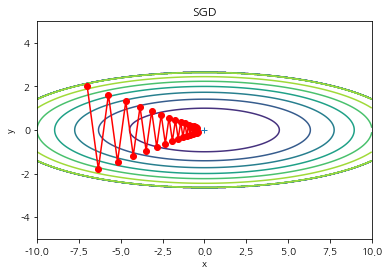

In [24]:
import sys, os
sys.path.append(os.pardir)     # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import SGD


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y    # f(x, y) = 1/20 * x^2 + y^2의 편도함수 해석적 미분(오차역전파법 미분) : df/dx = x/10,  df/dy = 2y


init_pos = (-7.0, 2.0)      # 파라미터 (x, y) 초기값 : params
params = {}
grads = {}


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    grads['x'], grads['y'] = 0, 0

    for i in range(30):     # 30번 학습
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.plot(x_history, y_history, 'o-', color="red")      # params 값 (x, y) 갱신 과정 그리기
    plt.contour(X, Y, Z)      # 등고선 그리기
    plt.plot(0, 0, '+')
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

- SGD는 위의 그래프와 같이 심하게 굽어진 움직임을 보여줌. 상당히 비효율적인 움직임
- SGD가 지그재그로 탐색하는 근본 원인은 기울어진 방향이 본래의 최소값과 다른 방향을 가리키기 때문임
- 결론적으로, **SGD는 비등방성 함수(anisotropy, 방향에 따라 성질이, 여기에서는 기울기가 달라지는 함수)에서는 탐색 경로가 비효율적임**
- **모멘텀, AdaGrid, Adam** 등이 SGD의 단점을 개선해주는 모델임

### [모멘텀]

- 모멘텀(momentum)은 "운동량"을 뜻하는 단어로 물리법칙과 관련 있음
- **모멘텀 수식** ---- \[식 6.3], \[6.4]
> $$\normalsize v \ \leftarrow \ \alpha \ v \ - \ \eta \ \frac{\delta L}{\delta W}$$ <br>
> $$\normalsize \matrix W \ \leftarrow \ + \ v$$ <br>
> - $\matrix W$는 갱신할 가중치 매개변수
> - $\large \frac{\delta L}{\delta W}$는 $\matrix W$에 대한 손실 함수의 기울기
> - $\normalsize \eta$는 학습률
> - $\normalsize v$는 물리학의 속도(velocity)에 해당하며, 위의 식은 기울기 방향으로 힘을 받아 물체가 가속된다는 물리법칙을 나타내며, <br>
     모멘텀에 $\normalsize v$를 적용한 효과로, 최적화 갱신 과정은 공이 그릇의 바닥을 구르는 듯한 움직임을 보여줌
> - $\normalsize \alpha v$ 항은 물체가 아무런 힘을 받지 않을 때 서서히 하강시키는 역할을 함 <br>
     ($\normalsize \alpha$는 0.9 등의 값으로 설정하며, 물리에서는 지면 마찰이나 공기 저항에 해당함)

In [23]:
# 모멘텀 구현
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, value in params.items():
                self.v[key] = np.zeros_like(value)
            
            for key in params.keys():
                self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
                params[key] = self.v[key]

- **모멘텀에 의한 최적화 갱신 경로**

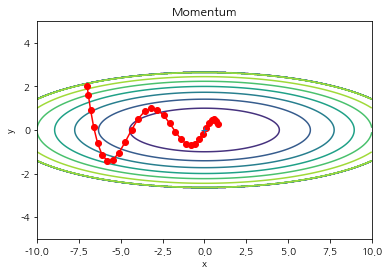

In [31]:
# 모멘텀에 의한 최적화 갱신 경로
import sys, os
sys.path.append(os.pardir)     # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import Momentum


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y    # f(x, y) = 1/20 * x^2 + y^2의 편도함수 해석적 미분(오차역전파법 미분) : df/dx = x/10,  df/dy = 2y


init_pos = (-7.0, 2.0)      # 파라미터 (x, y) 초기값 : params
params = {}
grads = {}


optimizers = OrderedDict()
optimizers["Momentum"] = Momentum(lr=0.1)

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    grads['x'], grads['y'] = 0, 0

    for i in range(30):     # 30번 학습
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.plot(x_history, y_history, 'o-', color="red")      # params 값 (x, y) 갱신 과정 그리기
    plt.contour(X, Y, Z)      # 등고선 그리기
    plt.plot(0, 0, '+')
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

- 모멘텀의 갱신 경로는 공이 그릇 바닥을 구르듯 움직임
> - $x$ 축의 힘은 아주 작지만 방향은 변하지 않아서 한 방향으로 일정하게 가속하고,
> - $y$ 축의 힘은 크지만 위아래로 번갈아 힘을 받아서 상충하여 $y$ 축 방향의 속도는 안정적이지 않음. <br>
> - 속도 탄력 때문에 (0, 0) 좌표를 지나쳤다가 학습을 더 반복하면 다시 (0, 0)을 찾아감 
- SGD 보다 $x$ 축 방향으로 빠르게 다가갈 수 있어서 지그재그 움직임을 줄일 수 있음

### [AdaGrid]

- 신경망 학습에서의 학습률(수식에서는 $\eta$로 표기) 값이 중요하며,
- 이 값이 너무 작으면 학습 시간이 너무 길어지고, 반대로 너무 크면 발산하여 올바른 학습을 할 수 없음
- 학습률을 정하는 효과적인 기술로 **학습률 감소(learning rate decay)** 가 있음. 이는 학습을 진행하면서 학습률을 서서히 줄여가는 방법임
- **AdaGrid는 개별 매개변수에 적응적으로(adaptive) 학습률을 조정하면서 학습을 진행함**

- **AdaGrid 수식** ---- \[식 6.5], \[식 6.6]
> $$\normalsize h \ \leftarrow \ h \ + \ \frac{\delta L}{\delta W} \odot \frac{\delta L}{\delta W}$$ <br>
> $$\normalsize \matrix W \ \leftarrow \ \matrix W \ - \ \eta \ \frac{1}{\sqrt{h}} \ \frac{\delta L}{\delta W}$$ <br>
> - $\matrix W$는 갱신할 가중치 매개변수
> - $\large \frac{\delta L}{\delta W}$는 $\matrix W$에 대한 손실 함수의 기울기
> - $\normalsize \eta$ 는 학습률
> - $\normalsize h$ 는 기존 기울기 값을 제곱하여 계속 더해줌 ($\normalsize \odot$ 기호는 행렬의 원소별 곱셈을 의미)
> - 매개변수를 갱신할 때 $\large \frac{1}{\sqrt{h}}$ 을 곱해 학습률을 조정하며,
> - **매개변수의 원소 중에서 많이 움직인(크게 갱신된) 원소는 학습률이 낮아진다는 뜻이며, 학습률 감소가 매개변수의 원소 마다 다르게 적용됨을 의미함**
> - AdaGrid는 과거의 기울기를 제곱하여 계속 더해가며, <br>
     학습을 진행할수록 갱신 강도가 약해져서, 무한히 계속 학습한다면 어느 순간 갱신량이 $0$이 되어 갱신되지 않게 됨
> - 이 문제를 개선한 **"RMSProp"**은 먼 과거의 기울기는 서시히 잊고 새로운 기울기 정보를 크게 반영함. <br>
     이를 **지수이동평균(Exponential Moving Average, EMA)** 이라 하며, 과거 기울기의 반영 규모를 기하급수적으로 감소시킴

In [8]:
# AdaGrid 구현
class AdaGrid:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            
            for key, value in params.items():
                self.v[key] = np.zeros_like(value)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]    # 행렬의 원소별 곱셈
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

- 마지막 줄에서 학습을 진행할수록 갱신 강도가 약해져서 np.sqrt(self.h\[key])가 0이 되는 것을 방지하기 위해 아주 작은 값(1e-7)을 더해줌 

- **AdaGrid에 의한 최적화 갱신 경로**

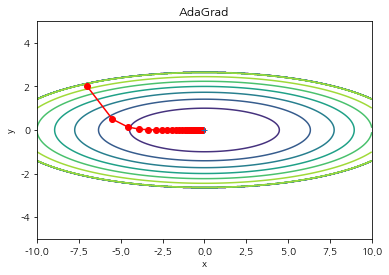

In [32]:
# AdaGrid에 의한 최적화 갱신 경로
import sys, os
sys.path.append(os.pardir)     # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import AdaGrad


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y    # f(x, y) = 1/20 * x^2 + y^2의 편도함수 해석적 미분(오차역전파법 미분) : df/dx = x/10,  df/dy = 2y


init_pos = (-7.0, 2.0)      # 파라미터 (x, y) 초기값 : params
params = {}
grads = {}


optimizers = OrderedDict()
optimizers["AdaGrad"] = AdaGrad(lr=1.5)

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    grads['x'], grads['y'] = 0, 0

    for i in range(30):     # 30번 학습
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.plot(x_history, y_history, 'o-', color="red")      # params 값 (x, y) 갱신 과정 그리기
    plt.contour(X, Y, Z)      # 등고선 그리기
    plt.plot(0, 0, '+')
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

- 최소값을 향해 효율적으로 움직이는 것을 알 수 있음
- $y$ 축 방향은 기울기가 커서 처음에는 크게 움직이지만, 그 큰 움직임에 비례해 갱신 정도도 큰 폭으로 작아지도록 조정됨

### [Adam]

- 모멘텀은 공이 그릇을 구르는 듯한 물리 법칙에 따른는 움직임을 보이며, AdaGrid는 매개변수의 원소마다 적응적으로 갱신 정도를 조정함
- Adam은 모멘텀과 AdaGrid 두가지 방법의 이점을 융합한 방법임
- Adam은 하이퍼파라미터의 "편향 보정"이 진행된다는 점도 특징임
- Adam은 학습률, $\beta_1$(1차 모멘텀 계수), $\beta_2$(2차 모멘텀 계수)을 하이퍼파라미터로 설정함 <br>
   논문에 따르면, 기본설정 값은 $\beta_1$은 0.9, $\beta_2$는 0.999이며, 많은 경우에 이 값으로 좋은 결과를 얻을 수 있음
- 구현된 클래스는 "common/optimizer.py" 참조

- **Adam에 의한 최적화 갱신 경로**

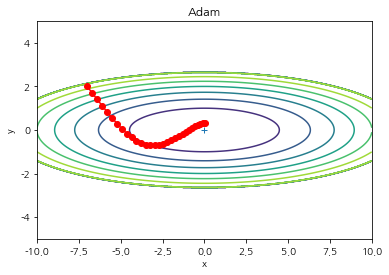

In [33]:
# Adam에 의한 최적화 갱신 경로
import sys, os
sys.path.append(os.pardir)     # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import Adam


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y    # f(x, y) = 1/20 * x^2 + y^2의 편도함수 해석적 미분(오차역전파법 미분) : df/dx = x/10,  df/dy = 2y


init_pos = (-7.0, 2.0)      # 파라미터 (x, y) 초기값 : params
params = {}
grads = {}


optimizers = OrderedDict()
optimizers["Adam"] = Adam(lr=0.3)

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    grads['x'], grads['y'] = 0, 0

    for i in range(30):     # 30번 학습
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.plot(x_history, y_history, 'o-', color="red")      # params 값 (x, y) 갱신 과정 그리기
    plt.contour(X, Y, Z)      # 등고선 그리기
    plt.plot(0, 0, '+')
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

### [어느 갱신 방법을 이용할 것인가?]

- 갱신 성능은 풀어야 할 문제가 무엇이냐에 따라 달라질 수 있음
- 학습률 등의 하이퍼파라미터를 어떻게 설정하느냐에 따라서도 결과가 달라질 수 있음
- Optimizer 별로 각자의 장단점이 있어서 잘 푸는 문제와 서툰 문제가 있음
- 이 책에서는 SGD와 Adam을 주로 사용하지만, 상황을 고려해 여러가지 Optimizer를 시도해볼 필요가 있음

### [MNIST 데이터셋으로 본 갱신 방법 비교]

- 소스 코드는 "ch06/optimizer_compare_mnist.py" 참조

- **MNIST 데이터셋에 대한 학습 진도 비교**

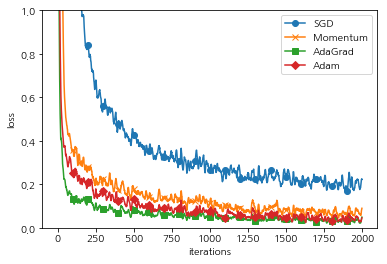

In [42]:
# MNIST 데이터셋에 대한 학습 진도 비교 
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve    # 손실 함수의 그래프를 매끄럽게 하기 위해 사용 (사용하지 않으면, 위 아래로 너무 넓게 퍼져 나옴)
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():          # 각 층은 100개의 뉴런으로 구성된 5층 신경망,  ReLU를 활성화 함수로 사용 (multi_layer_net.py 참조)
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    # loss 값 갱신 과정 출력
#     if (i % 100 == 0) or (i == max_iterations - 1):
#         print( "===========" + "iteration:" + str(i) + "===========")
#         for key in optimizers.keys():
#             loss = networks[key].loss(x_batch, t_batch)
#             print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

- 하이퍼파라미터인 학습률과 신경망의 구조(층 깊이 등)에 따라 결과가 달라질 수 있음
- 일반적으로 SGD 보다 다른 세 기법이 빠르게 학습하고, 때로는 최종 정확도도 높게 나타남

## 6.2 가중치의 초기값

- 신경망의 가중치 초기값을 무엇으로 설정 하느냐가 신경망 학습의 성패를 가르는 일이 실제로 자주 있음

### [가중치 초기값을 0으로 하면?]